In [6]:
# Install these packages if you haven't in the kernel 
!pip install numpy opencv-python tensorflow keras
!pip install tensorflow
# !pip install tensorflow-gpu
# !pip install opencv-python
# !pip install matplotlib
# !pip install numpy
# !pip install opencv-contrib-python 
# !pip install tensorflow-datasets
# !pip install datasets

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)


In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 467.6 kB/s eta 0:13:44
   ---------------------------------------- 0.1/385.2 MB 500.5 kB/s eta 0:12:50
   ---------------------------------------- 0.2/385.2 MB 525.1 kB/s eta 0:12:14
   ---------------------------------------- 0.2/385.2 MB 565.6 kB/s eta 0:11:21
   ---------------------------------------- 0.3/385.2 MB 628.5 kB/s eta 0:10:13
   ----------

In [8]:
from datasets import load_dataset

ds = load_dataset("FER-Universe/DiffusionFER")

README.md:   0%|          | 0.00/8.64k [00:00<?, ?B/s]

C:\Users\mkuzm\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mkuzm\.cache\huggingface\hub\datasets--FER-Universe--DiffusionFER. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


angry.zip:   0%|          | 0.00/13.8M [00:00<?, ?B/s]

disgust.zip:   0%|          | 0.00/6.77M [00:00<?, ?B/s]

fear.zip:   0%|          | 0.00/5.46M [00:00<?, ?B/s]

happy.zip:   0%|          | 0.00/26.1M [00:00<?, ?B/s]

neutral.zip:   0%|          | 0.00/26.4M [00:00<?, ?B/s]

sad.zip:   0%|          | 0.00/6.22M [00:00<?, ?B/s]

surprise.zip:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

angry.zip:   0%|          | 0.00/70.4M [00:00<?, ?B/s]

disgust.zip:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

fear.zip:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

happy.zip:   0%|          | 0.00/140M [00:00<?, ?B/s]

neutral.zip:   0%|          | 0.00/138M [00:00<?, ?B/s]

sad.zip:   0%|          | 0.00/31.8M [00:00<?, ?B/s]

surprise.zip:   0%|          | 0.00/77.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2581 [00:00<?, ? examples/s]

In [9]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2581
    })
})

In [10]:
data = ds['train'].to_pandas()
data

image  label
0     {'bytes': None, 'path': 'zip://angry/aaaaaaaa_...      0
1     {'bytes': None, 'path': 'zip://angry/aawkxnwq_...      0
2     {'bytes': None, 'path': 'zip://angry/advjljth_...      0
3     {'bytes': None, 'path': 'zip://angry/afyyhcow_...      0
4     {'bytes': None, 'path': 'zip://angry/amzejdso_...      0
...                                                 ...    ...
2576  {'bytes': None, 'path': 'zip://surprise/zoftjj...      6
2577  {'bytes': None, 'path': 'zip://surprise/ztcoae...      6
2578  {'bytes': None, 'path': 'zip://surprise/zwotwa...      6
2579  {'bytes': None, 'path': 'zip://surprise/zxdfgh...      6
2580  {'bytes': None, 'path': 'zip://surprise/zzjhhv...      6

[2581 rows x 2 columns]

In [11]:
data.iloc[0].image['path']

'zip://angry/aaaaaaaa_6.png::C:\\Users\\mkuzm\\.cache\\huggingface\\hub\\datasets--FER-Universe--DiffusionFER\\snapshots\\87332084b2e9c4187817bde8a605d0009b3bb19a\\DiffusionEmotion_S\\cropped\\angry.zip'

In [12]:
img = cv2.imread(data.iloc[200].image['path'])

TypeError: Image data of dtype object cannot be converted to float

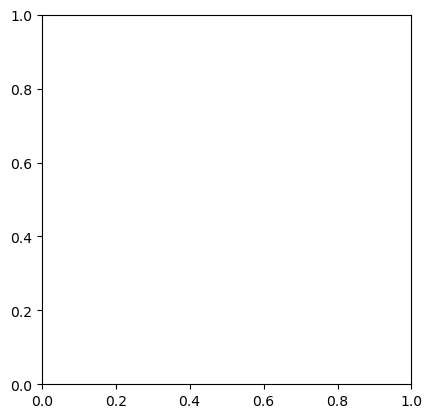

In [13]:
plt.imshow(img)

In [ ]:
def load_image(image_path):
    image = cv2.imread(image_path)
    return image

In [14]:
def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [16]:
def resize_image(image, target_size=(48, 48)):
    resized_image = cv2.resize(image, target_size)
    return resized_image


In [18]:
def normalize_image(image):
    normalized_image = image.astype('float32') / 255.0
    return normalized_image


In [20]:
def preprocess_image(image):
    image = img_to_array(image)  # Convert image to array
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


In [ ]:
def preprocess_image_for_emotion_detection(image_path, target_size=(48, 48)):
    # Load image
    image = load_image(image_path)
    
    # Convert to grayscale
    image = convert_to_grayscale(image)
    
    # Resize the image
    image = resize_image(image, target_size)
    
    # Normalize the image
    image = normalize_image(image)
    
    # Expand dimensions to match model input
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (for grayscale)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    
    return image


In [ ]:
array_images = []
for i in len(data):   
    image_path = data.iloc[i].image['path']
    preprocessed_image = preprocess_image_for_emotion_detection(image_path)
    array_images.append(preprocessed_image)

array_images[0]